## Итоговый проект по курсу "Библиотеки Python для Data Science: Numpy, Matplotlib, Scikit-learn"

## Содержание

1. Подключение библиотек и скриптов
2. Пути к директориям и файлам
3. Описание датасета
4. Загрузка данных
5. Приведение типов
6. Получение информации о данных (EDA)
7. Очистка данных и устранение пропусковии
8. Построение моделей
9. Прогнозирование на тестовом датасете
10. Вывод предсказания

### 1. Подключение библиотек и скриптов

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import datetime
import os

# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import KFold, GridSearchCV
# from sklearn.metrics import r2_score
# from sklearn.model_selection import cross_val_score, train_test_split
# from sklearn.feature_selection import RFE
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.preprocessing import StandardScaler, RobustScaler

from catboost import *
from catboost import CatBoostRegressor, datasets
from catboost import MetricVisualizer
from catboost import cv

In [2]:
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')
sns.set_context("paper", font_scale=1.5)
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 50)

### 2. Пути к директориям и файлам

In [3]:
TRAIN_DATASET_PATH = './input data/train.csv'
TEST_DATASET_PATH = './input data/test.csv'

### 3. Описание датасета


**Id** - идентификационный номер квартиры

**DistrictId** - идентификационный номер района

**Rooms** - количество комнат

**Square** - площадь

**LifeSquare** - жилая площадь

**KitchenSquare** - площадь кухни

**Floor** - этаж

**HouseFloor** - количество этажей в доме

**HouseYear** - год постройки дома

**Ecology_1**, **Ecology_2**, **Ecology_3** - экологические показатели местности

**Social_1**, **Social_2**, **Social_3** - социальные показатели местности

**Healthcare_1**, **Helthcare_2** - показатели местности, связанные с охраной здоровья

**Shops_1**, **Shops_2** - показатели, связанные с наличием магазинов, торговых центров

**Price** - цена квартиры


### 4. Загрузка данных

In [4]:
df_train = pd.read_csv(TRAIN_DATASET_PATH, index_col='Id')
df_test = pd.read_csv(TEST_DATASET_PATH, index_col='Id')

df_train.shape, df_test.shape

((10000, 19), (5000, 18))

In [5]:
df_train.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
14038,35,2.00,47.98,29.44,6.00,7,9.00,1969,0.09,B,B,33,7976,5,NaN,0,11,B,"184,966.93"
15053,41,3.00,65.68,40.05,8.00,7,9.00,1978,0.00,B,B,46,10309,1,240.00,1,16,B,"300,009.45"
4765,53,2.00,44.95,29.20,0.00,8,12.00,1968,0.05,B,B,34,7759,0,229.00,1,3,B,"220,925.91"
5809,58,2.00,53.35,52.73,9.00,8,17.00,1977,0.44,B,B,23,5735,3,"1,084.00",0,5,B,"175,616.23"
10783,99,1.00,39.65,23.78,7.00,11,12.00,1976,0.01,B,B,35,5776,1,"2,078.00",2,4,B,"150,226.53"


In [6]:
df_test.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
Id,,,,,,,,,,,,,,,,,,
725,58,2.00,49.88,33.43,6.00,6,14.00,1972,0.31,B,B,11,2748,1,NaN,0,0,B
15856,74,2.00,69.26,NaN,1.00,6,1.00,1977,0.08,B,B,6,1437,3,NaN,0,2,B
5480,190,1.00,13.60,15.95,12.00,2,5.00,1909,0.00,B,B,30,7538,87,"4,702.00",5,5,B
15664,47,2.00,73.05,51.94,9.00,22,22.00,2007,0.10,B,B,23,4583,3,NaN,3,3,B
14275,27,1.00,47.53,43.39,1.00,17,17.00,2017,0.07,B,B,2,629,1,NaN,0,0,A


### 5. Приведение типов

In [7]:
df_train.dtypes

DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [8]:
df_test.dtypes

DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
dtype: object

### 6. Получение информации о данных (EDA)

In [9]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     7887 non-null   float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  object 
 10  Ecology_3      10000 non-null  object 
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Healthcare_1   5202 non-null   float64
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  object 
 18  Pri

Можно отметить, что:
- есть пропуски в LifeSquare
- есть пропуски в Healthcare_1
- большая часть полей типа float64, но так же есть поля типа int64 и object

In [10]:
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 725 to 12504
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     5000 non-null   int64  
 1   Rooms          5000 non-null   float64
 2   Square         5000 non-null   float64
 3   LifeSquare     3959 non-null   float64
 4   KitchenSquare  5000 non-null   float64
 5   Floor          5000 non-null   int64  
 6   HouseFloor     5000 non-null   float64
 7   HouseYear      5000 non-null   int64  
 8   Ecology_1      5000 non-null   float64
 9   Ecology_2      5000 non-null   object 
 10  Ecology_3      5000 non-null   object 
 11  Social_1       5000 non-null   int64  
 12  Social_2       5000 non-null   int64  
 13  Social_3       5000 non-null   int64  
 14  Healthcare_1   2623 non-null   float64
 15  Helthcare_2    5000 non-null   int64  
 16  Shops_1        5000 non-null   int64  
 17  Shops_2        5000 non-null   object 
dtypes: fl

Аналогичная ситуация:
- есть пропуски в LifeSquare
- есть пропуски в Healthcare_1
- большая часть полей типа float64, но так же есть поля типа int64 и object

Статистика по всем количественным столбцам

In [11]:
df_train.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,"10,000.00","10,000.00","10,000.00","7,887.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","5,202.00","10,000.00","10,000.00","10,000.00"
mean,50.40,1.89,56.32,37.20,6.27,8.53,12.61,"3,990.17",0.12,24.69,"5,352.16",8.04,"1,142.90",1.32,4.23,"214,138.86"
std,43.59,0.84,21.06,86.24,28.56,5.24,6.78,"200,500.26",0.12,17.53,"4,006.80",23.83,"1,021.52",1.49,4.81,"92,872.29"
min,0.00,0.00,1.14,0.37,0.00,1.00,0.00,"1,910.00",0.00,0.00,168.00,0.00,0.00,0.00,0.00,"59,174.78"
25%,20.00,1.00,41.77,22.77,1.00,4.00,9.00,"1,974.00",0.02,6.00,"1,564.00",0.00,350.00,0.00,1.00,"153,872.63"
50%,36.00,2.00,52.51,32.78,6.00,7.00,13.00,"1,977.00",0.08,25.00,"5,285.00",2.00,900.00,1.00,3.00,"192,269.64"
75%,75.00,2.00,65.90,45.13,9.00,12.00,17.00,"2,001.00",0.20,36.00,"7,227.00",5.00,"1,548.00",2.00,6.00,"249,135.46"
max,209.00,19.00,641.07,"7,480.59","2,014.00",42.00,117.00,"20,052,011.00",0.52,74.00,"19,083.00",141.00,"4,849.00",6.00,23.00,"633,233.47"


In [12]:
df_test.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,"5,000.00","5,000.00","5,000.00","3,959.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","2,623.00","5,000.00","5,000.00"
mean,51.28,1.91,56.45,36.16,5.98,8.63,12.60,"1,984.39",0.12,24.93,"5,406.90",8.26,"1,146.66",1.32,4.24
std,44.18,0.84,19.09,17.83,9.95,5.48,6.79,18.57,0.12,17.53,"4,026.61",23.86,"1,044.74",1.48,4.78
min,0.00,0.00,1.38,0.33,0.00,1.00,0.00,"1,908.00",0.00,0.00,168.00,0.00,0.00,0.00,0.00
25%,21.00,1.00,41.91,23.09,1.00,4.00,9.00,"1,973.00",0.02,6.00,"1,564.00",0.00,325.00,0.00,1.00
50%,37.00,2.00,52.92,32.93,6.00,7.00,12.00,"1,977.00",0.07,25.00,"5,285.00",2.00,900.00,1.00,3.00
75%,77.00,2.00,66.29,45.17,9.00,12.00,17.00,"2,000.00",0.20,36.00,"7,287.00",5.00,"1,548.00",2.00,6.00
max,212.00,17.00,223.45,303.07,620.00,78.00,99.00,"2,020.00",0.52,74.00,"19,083.00",141.00,"4,849.00",6.00,23.00


Статистика по всем категориальным столбцам

In [13]:
df_train.describe(include='object')

,Ecology_2,Ecology_3,Shops_2
count,10000,10000,10000
unique,2,2,2
top,B,B,B
freq,9903,9725,9175


In [14]:
df_test.describe(include='object')

,Ecology_2,Ecology_3,Shops_2
count,5000,5000,5000
unique,2,2,2
top,B,B,B
freq,4952,4851,4588


In [15]:
df_train['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [16]:
df_train['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [17]:
df_train['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

Заменим текстовые значения признаков Ecology_2, Ecology_3 и Shops_2 бинарными значениями.

In [18]:
feature_bin_names = ['Ecology_2', 'Ecology_3', 'Shops_2']

df_train[feature_bin_names] = df_train[feature_bin_names].replace({'A' :0, 'B' :1})
df_test[feature_bin_names] = df_test[feature_bin_names].replace({'A' :0, 'B' :1})

Оценим взаимосвязь признаков

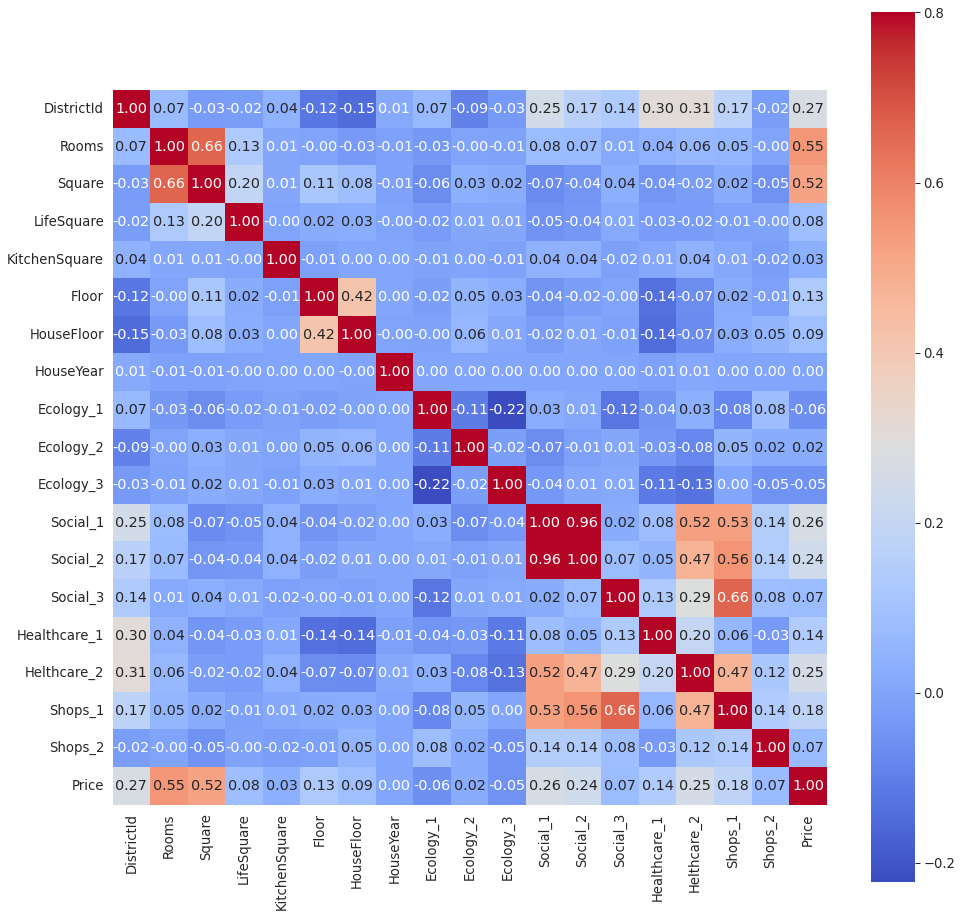

In [19]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(corrmat, vmax=.8, annot=True, fmt='.2f', cmap='coolwarm', square=True);

Можно заметить, что целевая переменная Price не сильно коррелирует с признаками, за исключением, наверное, Rooms и Square.

Оценим распределение параметров

array([[<AxesSubplot:title={'center':'DistrictId'}>,
        <AxesSubplot:title={'center':'Rooms'}>,
        <AxesSubplot:title={'center':'Square'}>,
        <AxesSubplot:title={'center':'LifeSquare'}>],
       [<AxesSubplot:title={'center':'KitchenSquare'}>,
        <AxesSubplot:title={'center':'Floor'}>,
        <AxesSubplot:title={'center':'HouseFloor'}>,
        <AxesSubplot:title={'center':'HouseYear'}>],
       [<AxesSubplot:title={'center':'Ecology_1'}>,
        <AxesSubplot:title={'center':'Ecology_2'}>,
        <AxesSubplot:title={'center':'Ecology_3'}>,
        <AxesSubplot:title={'center':'Social_1'}>],
       [<AxesSubplot:title={'center':'Social_2'}>,
        <AxesSubplot:title={'center':'Social_3'}>,
        <AxesSubplot:title={'center':'Healthcare_1'}>,
        <AxesSubplot:title={'center':'Helthcare_2'}>],
       [<AxesSubplot:title={'center':'Shops_1'}>,
        <AxesSubplot:title={'center':'Shops_2'}>,
        <AxesSubplot:title={'center':'Price'}>, <AxesSubplot:>]],


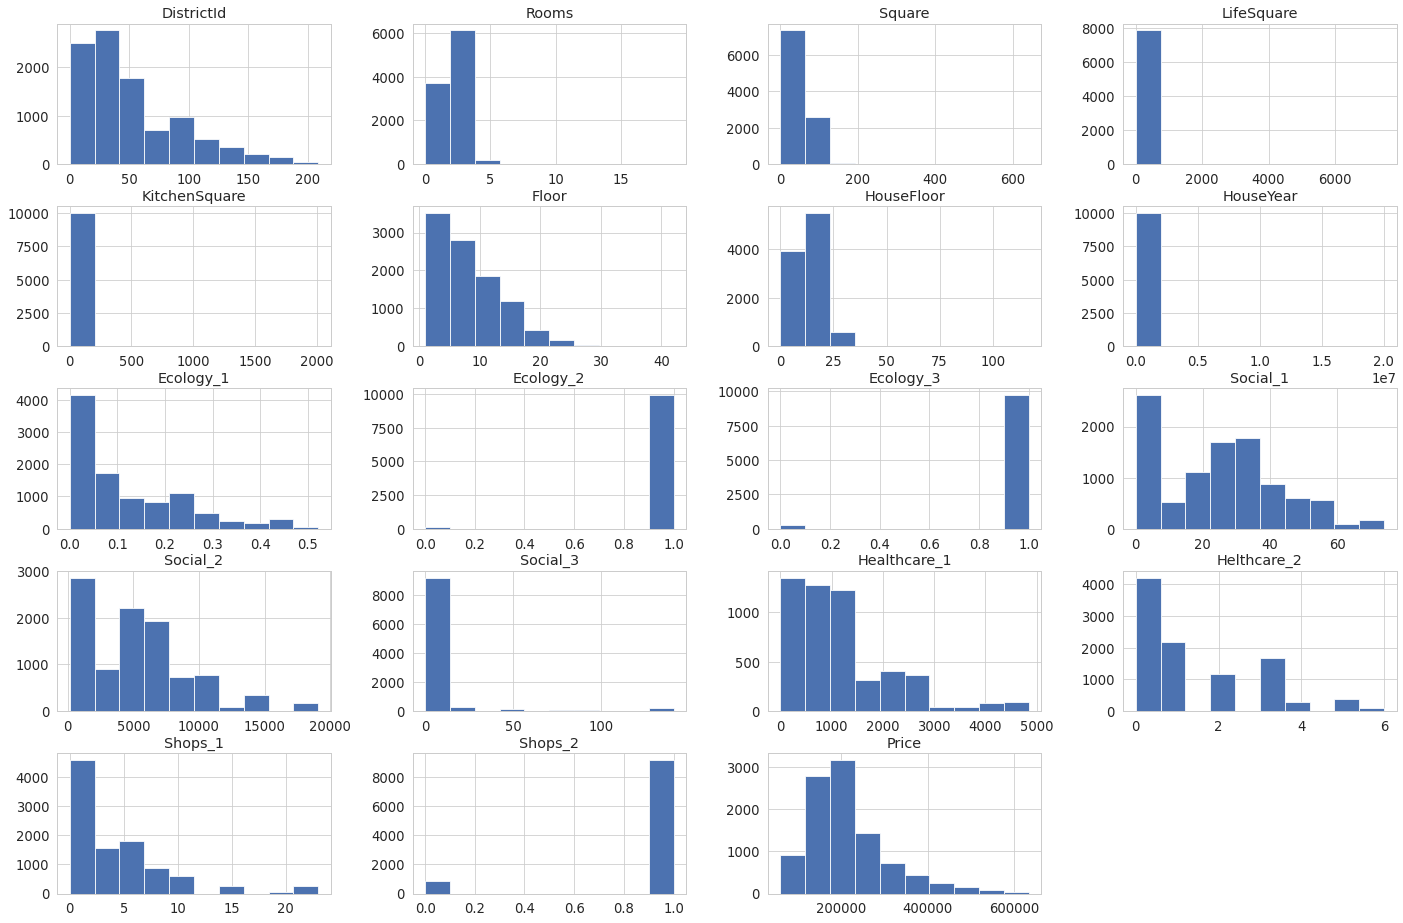

In [20]:
df_train.hist(figsize=(24,16))

Можно предположить о наличии выбросов в следующих признаках:
Room
Square
LifeSquare
KitchenSquare
Floor
HouseFloor
HouseYear
Social_3

#### Целевая переменная

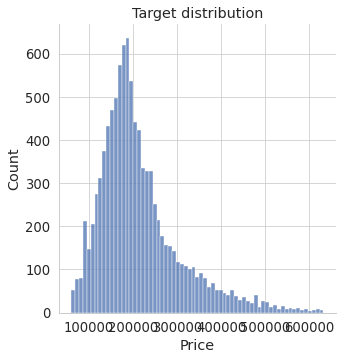

In [21]:
sns.displot(df_train['Price']),
plt.title('Target distribution');

### 7. Очистка данных и устранение пропусковии

Работу буду проводить над копиями признаков, сохранив оригинальные на всякий случай

In [22]:
# Новые столбцы в train
df_train['LS_corr'] = df_train['LifeSquare'].copy()
df_train['Square_corr'] = df_train['Square'].copy()

In [23]:
# Новые столбцы в test
df_test['LS_corr'] = df_test['LifeSquare'].copy()
df_test['Square_corr'] = df_test['Square'].copy()

In [24]:
#df_train

Определение количества пропусков в датасете

In [25]:
total = df_train.isnull().sum().sort_values(ascending=False)
percentage = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False) * 100
missing_data = pd.concat([total, percentage], axis=1, keys=['Total', 'Persent'])
missing_data.head()

,Total,Persent
Healthcare_1,4798,47.98
LS_corr,2113,21.13
LifeSquare,2113,21.13
DistrictId,0,0.00
Social_1,0,0.00


In [26]:
total_test = df_test.isnull().sum().sort_values(ascending=False)
percentage = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False) * 100
missing_data = pd.concat([total, percentage], axis=1, keys=['Total', 'Persent'])
missing_data.head()

,Total,Persent
Healthcare_1,4798,47.54
LS_corr,2113,20.82
LifeSquare,2113,20.82
DistrictId,0,0.00
Social_1,0,0.00


Вывод: Для train имеем два признака с пропусками: LifeSquare - 21,13% и Healthcare_1 - 47,98%.
Для test ситуация аналогичная 20,82% и 47,54%, соответственно.
Произведем работу над ними.
Будем проводить аналитику над train и повторять итоговые действия в test.

#### Healthcare_1

В данном признаке почти 48% пропусков. Возможно его заполнение, например медианными значениями или удаление признака полностью.
Попытки его заполнения привели к ухудшению метрики. Поэтому принял решение его удалить из train и test.

In [27]:
if 'Healthcare_1' in df_train.columns:
    df_train.drop('Healthcare_1', axis=1, inplace=True)

if 'Healthcare_1' in df_test.columns:
    df_test.drop('Healthcare_1', axis=1, inplace=True)

#### LifeSquare


In [28]:
df_train[['Rooms', 'Square', 'LifeSquare', 'KitchenSquare']].describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,"10,000.00",1.89,0.84,0.00,1.00,2.00,2.00,19.00
Square,"10,000.00",56.32,21.06,1.14,41.77,52.51,65.90,641.07
LifeSquare,"7,887.00",37.20,86.24,0.37,22.77,32.78,45.13,"7,480.59"
KitchenSquare,"10,000.00",6.27,28.56,0.00,1.00,6.00,9.00,"2,014.00"


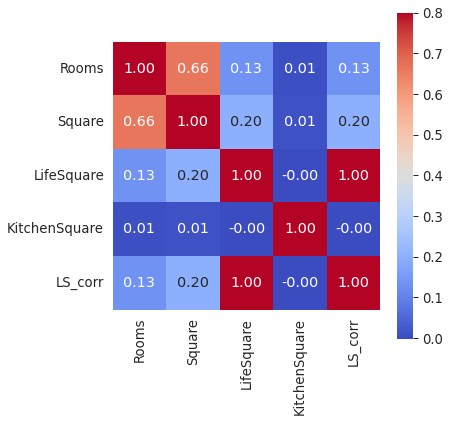

In [29]:
corrmat2 = df_train[['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'LS_corr']].corr()
f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(corrmat2, vmax=.8, annot=True, fmt='.2f', cmap='coolwarm', square=True);

Не смотря на логичность корреляции 'LifeSquare' с признаками 'Rooms', 'Square', 'KitchenSquare', по факту она почти отсутсвует.

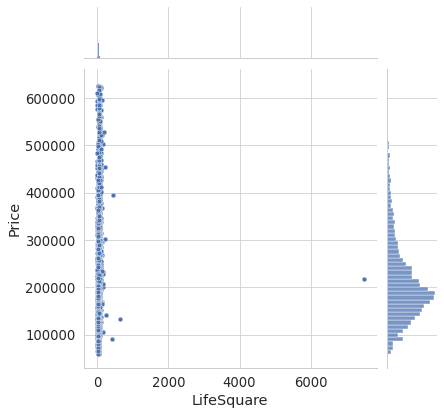

In [30]:
sns.jointplot(df_train['LifeSquare'], df_train['Price'], kind='scatter', height=6);

In [31]:
df_train.loc[df_train['LS_corr'] < 0.86, 'LS_corr'] *= 100
df_train.loc[((df_train['LS_corr'] >= 0.86) & (df_train['LS_corr'] <= 10)), 'LS_corr'] *= 10
df_train.loc[((df_train['LS_corr'] > 250) & (df_train['LS_corr'] <= 500)), 'LS_corr'] /= 10
df_train.loc[df_train['LS_corr'] > 250, 'LS_corr'] /= 100

df_test.loc[df_test['LS_corr'] < 0.86, 'LS_corr'] *= 100
df_test.loc[((df_test['LS_corr'] >= 0.86) & (df_test['LS_corr'] <= 10)), 'LS_corr'] *= 10
df_test.loc[((df_test['LS_corr'] > 250) & (df_test['LS_corr'] <= 500)), 'LS_corr'] /= 10
df_test.loc[df_test['LS_corr'] > 250, 'LS_corr'] /= 100

#### Square

In [32]:
df_train.loc[df_train['Square_corr'] < 10, 'Square_corr'] *= 10
df_train.loc[df_train['Square_corr'] > 300, 'Square_corr'] /= 10

df_test.loc[df_test['Square_corr'] < 10, 'Square_corr'] *= 10
df_test.loc[df_test['Square_corr'] > 300, 'Square_corr'] /= 10

In [33]:
df_train

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,LS_corr,Square_corr
Id,,,,,,,,,,,,,,,,,,,,
14038,35,2.00,47.98,29.44,6.00,7,9.00,1969,0.09,1,1,33,7976,5,0,11,1,"184,966.93",29.44,47.98
15053,41,3.00,65.68,40.05,8.00,7,9.00,1978,0.00,1,1,46,10309,1,1,16,1,"300,009.45",40.05,65.68
4765,53,2.00,44.95,29.20,0.00,8,12.00,1968,0.05,1,1,34,7759,0,1,3,1,"220,925.91",29.20,44.95
5809,58,2.00,53.35,52.73,9.00,8,17.00,1977,0.44,1,1,23,5735,3,0,5,1,"175,616.23",52.73,53.35
10783,99,1.00,39.65,23.78,7.00,11,12.00,1976,0.01,1,1,35,5776,1,2,4,1,"150,226.53",23.78,39.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,32,2.00,50.40,30.48,5.00,6,5.00,1968,0.14,1,1,46,7960,6,3,11,1,"196,684.32",30.48,50.40
6159,18,1.00,41.52,20.54,9.00,13,13.00,2000,0.00,1,1,30,5562,0,0,5,0,"189,050.29",20.54,41.52
5123,27,1.00,47.94,NaN,1.00,12,16.00,2015,0.07,1,1,2,629,1,0,0,0,"159,143.81",NaN,47.94


### 8. Построение моделей

#### Отбор признаков

In [34]:
feature_names = df_train.columns
feature_names.tolist()

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'LS_corr',
 'Square_corr']

In [35]:
target_name = ['Price']
feature_names =\
    ['DistrictId',
     'Rooms',
#     'Square',
     'Square_corr',
#     'LifeSquare',
     'LS_corr',
     'KitchenSquare',
     'Floor',
     'HouseFloor',
     'HouseYear',
     'Ecology_1',
     'Ecology_2',
     'Ecology_3',
     'Social_1',
     'Social_2',
     'Social_3',
#     'Healthcare_1',
     'Helthcare_2',
     'Shops_1',
     'Shops_2',
#     'Price'
]


In [36]:
X = df_train[feature_names]
y = df_train[target_name]

In [37]:
len(feature_names)

17

#### CatBoostRegressor

In [38]:
dataset_dir = './temp'
if not os.path.exists(dataset_dir):
    os.makedirs(dataset_dir)

X.to_csv(
    os.path.join(dataset_dir, 'X.tsv'),
    index=False, sep='\t', header=False
)
df_test.to_csv(
    os.path.join(dataset_dir, 'test.tsv'),
    index=False, sep='\t', header=False
)

X.to_csv(
    os.path.join(dataset_dir, 'X.csv'),
    index=False, sep=',', header=True
)
df_test.to_csv(
    os.path.join(dataset_dir, 'test.csv'),
    index=False, sep=',', header=True
)

In [39]:
!head temp/X.csv

DistrictId,Rooms,Square_corr,LS_corr,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
35,2.0,47.98156123517504,29.44275054713416,6.0,7,9.0,1969,0.089039719,1,1,33,7976,5,0,11,1
41,3.0,65.68363987232782,40.04954252356545,8.0,7,9.0,1978,6.99893e-05,1,1,46,10309,1,1,16,1
53,2.0,44.947952764125,29.1976116880482,0.0,8,12.0,1968,0.049637257,1,1,34,7759,0,1,3,1
58,2.0,53.35298135561334,52.73151204863503,9.0,8,17.0,1977,0.43788524,1,1,23,5735,3,0,5,1
99,1.0,39.64919195003,23.7761691108976,7.0,11,12.0,1976,0.012338886,1,1,35,5776,1,2,4,1
59,3.0,80.38447920267191,46.68372012823429,12.0,5,17.0,2011,0.309479124,1,1,35,7715,4,0,6,1
154,2.0,62.2541135864025,37.16037741888674,7.0,3,5.0,1960,0.460556389,1,1,20,4386,14,1,5,1
74,2.0,80.31292563185586,,0.0,14,0.0,1977,0.075778755,1,1,6,1437,3,0,2,1
1,2.0,64.51143730838427,,1.0,9,17.0,1977,0.0071223169999999,1,1,1,264,0,0,1,1


In [40]:
from catboost.utils import create_cd
feature_names = dict()
for column, name in enumerate(X):
    if column == 0:
        continue
    feature_names[column - 1] = name

create_cd(
    label=0,
    cat_features=list((9, 10, 16)),
    feature_names=feature_names,
output_path=os.path.join(dataset_dir, 'X.cd')
)

In [41]:
!cat temp/X.cd

0	Label	
1	Num	Rooms
2	Num	Square_corr
3	Num	LS_corr
4	Num	KitchenSquare
5	Num	Floor
6	Num	HouseFloor
7	Num	HouseYear
8	Num	Ecology_1
9	Categ	Ecology_2
10	Categ	Ecology_3
11	Num	Social_1
12	Num	Social_2
13	Num	Social_3
14	Num	Helthcare_2
15	Num	Shops_1
16	Categ	Shops_2


Categorical features declaration

In [42]:
cat_features = list((9, 10, 16))
print(cat_features)

[9, 10, 16]


In [43]:
pool = Pool(data=X, label=y, cat_features=cat_features)
print('Dataset shape')
print('dataset:' + str(pool.shape))
print('Column names')
print(pool.get_feature_names())

Dataset shape
dataset:(10000, 17)
Column names
['DistrictId', 'Rooms', 'Square_corr', 'LS_corr', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Helthcare_2', 'Shops_1', 'Shops_2']


In [44]:
#Cross-validation
params = {}
params['loss_function'] = 'RMSE'
params['iterations'] = 80
params['random_seed'] = 42
params['learning_rate'] = 0.5
params['eval_metric'] = 'R2'

cv_data = cv(
    params = params,
    pool = Pool(X, label=y, cat_features=cat_features),
    fold_count=5,
    shuffle=True,
    partition_random_seed=0,
    plot=True,
    stratified=False,
    verbose=False
)
best_value = np.min(cv_data['test-R2-mean'])
best_iter = np.argmin(cv_data['test-R2-mean'])

print('Best validation R2 score, stratified: {:.4f}±{:.4f} on step {}'.format(
    best_value,
    cv_data['test-R2-std'][best_iter],
    best_iter)
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Best validation R2 score, stratified: -1.0216±0.0527 on step 0


In [45]:
cv_data.head()

,iterations,test-R2-mean,test-R2-std,train-R2-mean,train-R2-std,test-RMSE-mean,test-RMSE-std,train-RMSE-mean,train-RMSE-std
0,0,-1.02,0.05,-1.01,0.01,"131,982.01","1,006.35","131,803.77",262.22
1,1,0.15,0.03,0.16,0.00,"85,762.10",958.23,"85,300.83",268.38
2,2,0.47,0.02,0.48,0.00,"67,336.70",962.79,"66,689.05",230.07
3,3,0.59,0.01,0.60,0.00,"59,281.63","1,251.44","58,437.05",192.53
4,4,0.63,0.01,0.65,0.00,"56,367.04","1,275.96","55,131.53",195.95


Overfitting detector

In [46]:
model_with_early_stop = CatBoostRegressor(
    eval_metric='R2',
    iterations=1100,
    random_seed=42,
    learning_rate=0.5,
    early_stopping_rounds=20
)
model_with_early_stop.fit(
    X, y,
    cat_features=cat_features,
    #eval_set=(X_validation, y_validation),
    verbose=False,
    plot=True
)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [47]:
print(model_with_early_stop.tree_count_)

1100


Feature importances

In [48]:
model_with_early_stop.get_feature_importance(prettified=True)

,Feature Id,Importances
0,Square_corr,21.17
1,Social_1,10.50
2,DistrictId,10.38
3,Social_3,9.76
4,Ecology_1,8.33
5,HouseYear,7.38
6,Social_2,6.14
7,LS_corr,5.27
8,KitchenSquare,4.80
9,Floor,4.59


Shap values

In [49]:
shap_values = model_with_early_stop.get_feature_importance(pool, type='ShapValues')

expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

print(shap_values.shape)

(10000, 17)


In [50]:
import shap
shap.initjs()
shap.force_plot(expected_value, shap_values[3,:], X.iloc[3,:])

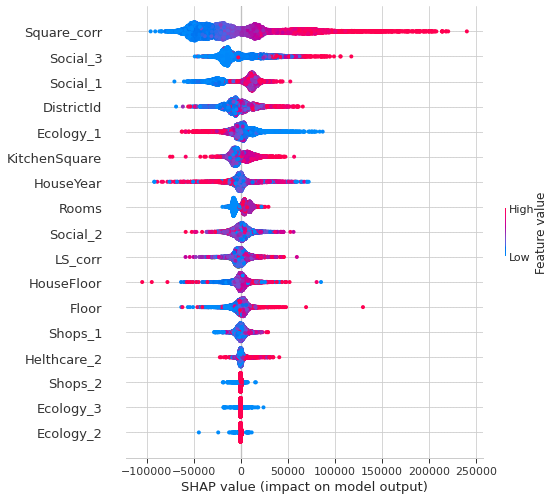

In [51]:
shap.summary_plot(shap_values, X)

X_small = X.iloc[0:200]
shap_small = shap_values[:200]
shap.force_plot(expected_value, shap_small, X_small)

Feature evaluation
Оценка нужности сгенерированных фичей

In [52]:
from catboost.eval.catboost_evaluation import *
learn_params = {'iterations': 20,
                'learning_rate': 0.5, 
                'random_seed': 0,
                'verbose': False,
                'loss_function' : 'RMSE',
                'boosting_type': 'Plain'}
evaluator = CatboostEvaluation('temp/X.tsv',
                               fold_size=5000, 
                               fold_count=20,
                               column_description='temp/X.cd',
                               partition_random_seed=0,                              
                               )
result = evaluator.eval_features(learn_config=learn_params,
                                 eval_metrics=['R2'],
                                 features_to_eval=[1, 2, 3])

In [53]:
from catboost.eval.evaluation_result import *
R2_result = result.get_metric_results('R2')
R2_result.get_baseline_comparison(
    ScoreConfig(ScoreType.Rel, overfit_iterations_info=False)
)

,PValue,Score,Quantile 0.005,Quantile 0.995,Decision
Features: 1,0.05,-0.63,-1.33,0.04,UNKNOWN
Features: 2,0.79,-0.07,-1.02,0.86,UNKNOWN
Features: 3,0.30,0.45,-0.39,1.38,UNKNOWN


Hyperparameter tunning

Training accuracy  
(модель нацеленная на точность)

In [54]:

tunned_model = CatBoostRegressor(
    eval_metric='R2',
    random_seed=42,
    iterations=1000,
    learning_rate=0.03,
    l2_leaf_reg=3,
    bagging_temperature=1,
    random_strength=1,
    one_hot_max_size=2,
    leaf_estimation_method='Newton'
)
tunned_model.fit(
    X, y,
    cat_features=cat_features,
    verbose=False,
    eval_set=(X, y), 
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training the model after parameter tunning

In [55]:
best_model = CatBoostRegressor(
    eval_metric='R2',
    random_seed=42,
    iterations=int(tunned_model.tree_count_*5), # увеличение количества итераций больше 2500-3000 даёт очень маленький прирост
)
best_model.fit(
    X, y,
    cat_features=cat_features,
    verbose=100
)

Learning rate set to 0.017305
0:	learn: 0.0185174	total: 1.86ms	remaining: 9.28s
100:	learn: 0.6306599	total: 170ms	remaining: 8.22s
200:	learn: 0.7101677	total: 320ms	remaining: 7.63s
300:	learn: 0.7404802	total: 459ms	remaining: 7.16s
400:	learn: 0.7594892	total: 600ms	remaining: 6.88s
500:	learn: 0.7726695	total: 737ms	remaining: 6.62s
600:	learn: 0.7841359	total: 875ms	remaining: 6.4s
700:	learn: 0.7934081	total: 1.01s	remaining: 6.2s
800:	learn: 0.8007725	total: 1.15s	remaining: 6.04s
900:	learn: 0.8070307	total: 1.28s	remaining: 5.84s
1000:	learn: 0.8127937	total: 1.42s	remaining: 5.66s
1100:	learn: 0.8182344	total: 1.56s	remaining: 5.51s
1200:	learn: 0.8234281	total: 1.7s	remaining: 5.36s
1300:	learn: 0.8281330	total: 1.83s	remaining: 5.2s
1400:	learn: 0.8325775	total: 1.97s	remaining: 5.05s
1500:	learn: 0.8368997	total: 2.1s	remaining: 4.9s
1600:	learn: 0.8410754	total: 2.24s	remaining: 4.76s
1700:	learn: 0.8448616	total: 2.38s	remaining: 4.61s
1800:	learn: 0.8486547	total: 2.5

### 9. Прогнозирование на тестовом датасете

In [57]:
test_pool = Pool(data=df_test, cat_features=cat_features)
contest_predictions = best_model.predict(test_pool)
print('Predictoins:')
print(contest_predictions)

Predictoins:
[163410.91202276 226122.24459616 207933.03595711 ... 321273.29570561
 164386.73090811 171067.24421242]


In [58]:
preds = pd.DataFrame()
preds['Id'] = df_test.index
preds['Price'] = contest_predictions
#preds.head()

### 10. Вывод предсказания

In [59]:
preds.to_csv('my_submission_18.12_7.csv', index=False)